<b>
Name : ANJISHNU ROY <br/>
Registration No. : 21401007 <br/>
Department : MBA DA <br/>
Assignment : Implemeting Supervised/Unsupervised Learning Algorithms <br/>
</b>

Importing Libraries 

In [59]:
import base64
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans 
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import nltk
from nltk.stem import WordNetLemmatizer
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from keras.utils import np_utils

Supervised Learning : We try to implement some regression models on the popular SAS cars dataset

Cleaning up the data

In [2]:
df = pd.read_csv('./cars.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [3]:
df.shape

(428, 15)

In [4]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(426, 15)

Let's make a correlation matrix w/ the numerical variables

In [7]:
#List of the numerical variables
df.select_dtypes(include=np.number).columns.tolist()

['MSRP',
 'Invoice',
 'EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [8]:
df_corr = df.select_dtypes(include=np.number)

<AxesSubplot:>

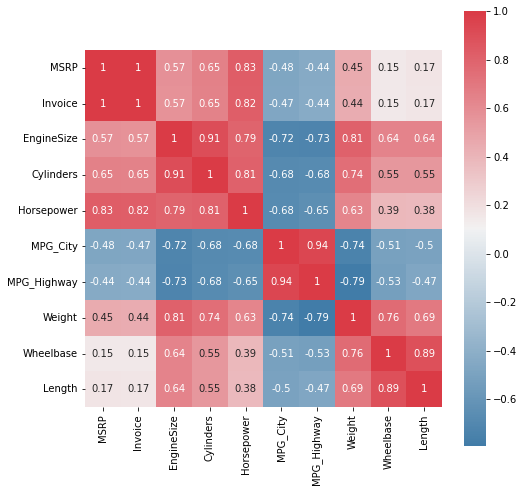

In [9]:
plt.figure(figsize = (8,8))
corr = df_corr.corr()
sns.heatmap(corr, annot= True, cmap=sns.diverging_palette(240,10,as_cmap=True),square=True)

Let us imagine that our dependent variable is EngineSize<br/>
We can see that the variables : Weight, Horsepower, Cylinders have high positive correlation w/ EngineSize<br/>
<br/>
It makes sense to normalize the data for multiple regression models

In [10]:
def normalize(df_,features):
    result = df_.copy()
    for feature_name in features:
        max_value = df_[feature_name].max()
        min_value = df_[feature_name].min()
        result[feature_name] = (df_[feature_name] - min_value) / (max_value - min_value)
    return result

In [11]:
df_mod = normalize(df_corr,['EngineSize','Weight','Horsepower','Cylinders'])

In [12]:
y = df_mod[['EngineSize']]
x = df_mod[['Weight','Horsepower','Cylinders']]

In [13]:
x.head()

,Weight,Horsepower,Cylinders
0,0.487079,0.449649,0.333333
1,0.173783,0.297424,0.111111
2,0.258427,0.297424,0.111111
3,0.323034,0.461358,0.333333
4,0.380150,0.355972,0.333333


In [14]:
y.head()

,EngineSize
0,0.304348
1,0.086957
2,0.144928
3,0.260870
4,0.304348


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=lin_reg.predict(x_test)

Evaluating Accuracy : We use the r^2 value; which has a range of [0,1]

In [18]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f %%" %Accuracy)

 Accuracy of the model is 86.11 %


<AxesSubplot:xlabel='EngineSize'>

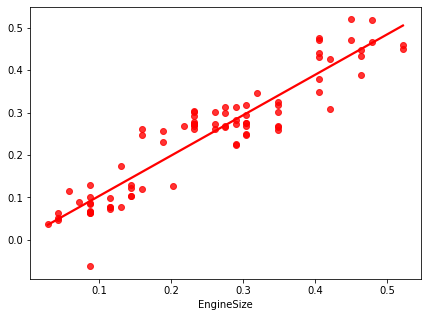

In [19]:
plt.figure(figsize=(7,5))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

Logistic regression

Titanic dataset is used for this 

In [25]:
titanic = pd.read_csv("./titanic/train.csv")

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
ports = pd.get_dummies(titanic.Embarked , prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
titanic = titanic.join(ports)
titanic.drop(['Embarked'], axis=1, inplace=True)

In [29]:
titanic.Sex = titanic.Sex.map({'male':0, 'female':1})

In [31]:
y = titanic.Survived.copy() # copy “y” column values out

In [32]:
X = titanic.drop(['Survived'], axis=1) # then, drop y column

In [33]:
X.drop(['Cabin'], axis=1, inplace=True)

In [34]:
X.drop(['Ticket'], axis=1, inplace=True) 

In [35]:
X.drop(['Name'], axis=1, inplace=True) 
X.drop(['PassengerId'], axis=1, inplace=True)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [37]:
X.isnull().values.any()

True

In [38]:
X.Age.fillna(X.Age.mean(), inplace=True)  # replace NaN with average age

In [39]:
X.isnull().values.any()

False

In [40]:
from sklearn.model_selection import train_test_split
  # 80 % go into the training test, 20% in the validation test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

d:\SoftWare\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [45]:
model.score(X_train, y_train)

0.8089887640449438

In [46]:
model.score(X_valid, y_valid)

0.7541899441340782

Implementing binary classification with Decision Tree Classifier

Entropy is the measure of randomness at every stage of the decision tree <br/>
Reduction of Entropy is the goal 

In [48]:
model = DecisionTreeClassifier()

In [49]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
model.score(X_train, y_train)

0.9831460674157303

In [51]:
model.score(X_valid, y_valid)

0.7318435754189944

Now implemeting the Naive Bayes algorithm

We observe that train score and validation score are much closer here
This may be the best classifier overall

In [54]:
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [55]:
classifier.score(X_train, y_train)

0.797752808988764

In [56]:
classifier.score(X_valid, y_valid)

0.770949720670391

Unsupervised Learning 

We will attempt to implemet a k-means clustering algorithm

Steps to be implemeted : <br/>
1. Determine value of K <br/>
2. Selecting random K points <br/>
3. Assigning data points to closest centroid <br/>
4. Calculating variance and determining new centroids <br/>
5. Step 3 repeated - If reassignment occurs : goto Step 4 ; Else : goto Step 6 <br/>
6. END

We will continue with the cars dataset

In [ ]:
df = pd.read_csv('./cars.csv')

In [20]:
x = df[['Weight','Wheelbase']].values

In [21]:
wcss_list= [] 

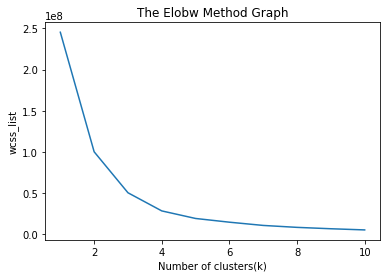

In [22]:
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

From the plot generated above - it looks like the optimal value for k is 3 (elbow point)

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

Plotting the optimal clusters

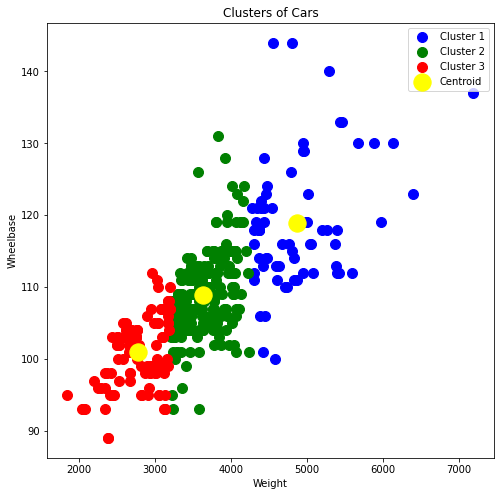

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of Cars')
plt.xlabel('Weight')  
plt.ylabel('Wheelbase')  
plt.legend()  
plt.show()  

Hierarchical clustering:
1. Data Pre-processing
2. Finding the optimal number of clusters using the Dendrogram
3. Training the hierarchical clustering model
4. Visualizing the clusters

In [25]:
x = df[['Weight','Wheelbase']].values

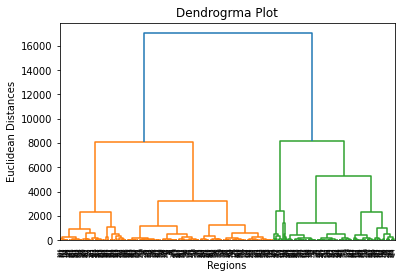

In [28]:
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Regions")  
plt.show()  

Using this Dendrogram, we will now determine the optimal number of clusters for our model. For this, we will find the maximum vertical distance that does not cut any horizontal bar. Consider the below diagram:

In [30]:
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

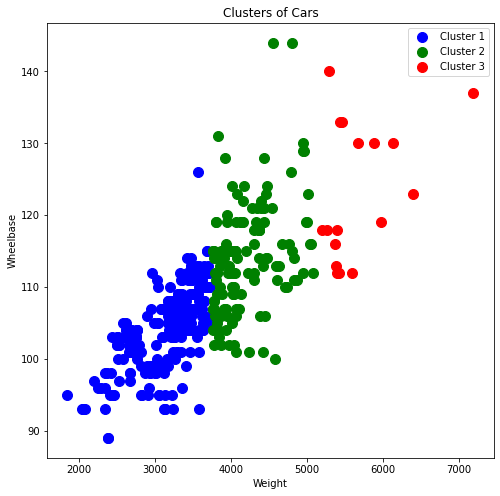

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')   
plt.title('Clusters of Cars')
plt.xlabel('Weight')  
plt.ylabel('Wheelbase')  
plt.legend()  
plt.show()  

Association rules ( Apriori ) :

Used to implement reccomender systems based on products already in consumers purchases

In [4]:
data1 = pd.read_excel('.\Online_Retail.xlsx')  
data1.head() 

<>:1: DeprecationWarning: invalid escape sequence \O
<>:1: DeprecationWarning: invalid escape sequence \O
C:\Users\Anjishnu Roy\AppData\Local\Temp\ipykernel_16756\407837724.py:1: DeprecationWarning: invalid escape sequence \O
  data1 = pd.read_excel('.\Online_Retail.xlsx')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


We will strip the extra spaces in the description  

In [6]:
data1['Description'] = data1['Description'].str.strip()

Drop the rows which does not have any invoice number  


In [7]:
data1.dropna(axis = 0, subset = ['InvoiceNo'], inplace = True)  
data1['InvoiceNo'] = data1['InvoiceNo'].astype('str')

We will drop all transactions which were done on credit 

In [8]:
data1 = data1[~data1['InvoiceNo'].str.contains('C')]

Split data by region

In [9]:
basket1_France = (data1[data1['Country'] == "France"]  
        .groupby(['InvoiceNo', 'Description'])['Quantity']  
        .sum().unstack().reset_index().fillna(0)  
        .set_index('InvoiceNo'))  
  
basket1_UK = (data1[data1['Country'] == "United Kingdom"]  
        .groupby(['InvoiceNo', 'Description'])['Quantity']  
        .sum().unstack().reset_index().fillna(0)  
        .set_index('InvoiceNo'))  
  
basket1_Por = (data1[data1['Country'] == "Portugal"]  
        .groupby(['InvoiceNo', 'Description'])['Quantity']  
        .sum().unstack().reset_index().fillna(0)  
        .set_index('InvoiceNo'))  
  
basket1_Sweden = (data1[data1['Country'] == "Sweden"]  
        .groupby(['InvoiceNo', 'Description'])['Quantity']  
        .sum().unstack().reset_index().fillna(0)  
        .set_index('InvoiceNo'))  

Implemeting one hot encoding (limiting values to 0 or 1)

In [10]:
def hot_encode1(P):  
    if(P<= 0):  
        return 0  
    if(P>= 1):  
        return 1  

In [11]:
basket1_encoded = basket1_France.applymap(hot_encode1)  
basket1_France = basket1_encoded  
  
basket1_encoded = basket1_UK.applymap(hot_encode1)  
basket1_UK = basket1_encoded  
  
basket1_encoded = basket1_Por.applymap(hot_encode1)  
basket1_Por = basket1_encoded  
  
basket1_encoded = basket1_Sweden.applymap(hot_encode1)  
basket1_Sweden = basket1_encoded  

Implemeting a model for France

In [12]:
frq_items1 = apriori(basket1_France, min_support = 0.05, use_colnames = True)  

d:\SoftWare\Python\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
rules1 = association_rules(frq_items1, metric = "lift", min_threshold = 1)  
rules1 = rules1.sort_values(['confidence', 'lift'], ascending = [False, False])  
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,0.765306,0.076531,1.000,1.306667,0.017961,inf,0.254144
259,"(PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...",(POSTAGE),0.051020,0.765306,0.051020,1.000,1.306667,0.011974,inf,0.247312
271,"(PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...",(POSTAGE),0.053571,0.765306,0.053571,1.000,1.306667,0.012573,inf,0.247978
301,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975,7.644000,0.086474,34.897959,0.967949
300,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975,7.077778,0.085433,34.489796,0.956294


Text Mining 

In [2]:
train = pd.read_csv("./spooky-author-identification/train/train.csv")

Authors and their text

In [3]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


EDA

In [4]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

NLP :

1. **Tokenization** - Segregation of the text into its individual constitutent words. 
2. **Stopwords** - Throw away any words that occur too frequently as its frequency of occurrence will not be useful in helping detecting relevant texts. (as an aside also consider throwing away words that occur very infrequently).
3. **Stemming**  - combine variants of words into a single parent word that still conveys the same meaning
4. **Vectorization** - Converting text into vector format. One of the simplest is the famous bag-of-words approach, where you create a matrix (for each document or text in the corpus). In the simplest form, this matrix stores word frequencies (word counts) and is oft referred to as vectorization of the raw text. 

In [7]:
first_text = train.text.values[0]
print(first_text)
print("="*90)
print(first_text.split(" "))

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
['This', 'process,', 'however,', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon;', 'as', 'I', 'might', 'make', 'its', 'circuit,', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out,', 'without', 'being', 'aware', 'of', 'the', 'fact;', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall.']


In [8]:
first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']


In [9]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [10]:
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print("="*90)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['process', ',', 'however', ',', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', ';', 'might', 'make', 'circuit', ',', 'return', 'point', 'whence', 'set', ',', 'without', 'aware', 'fact', ';', 'perfectly', 'uniform', 'seemed', 'wall', '.']
Length of original list: 48 words
Length of list after stopwords removal: 28 words


Stemming and Lemmatization

In [11]:
stemmer = nltk.stem.PorterStemmer()

In [12]:
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [13]:
print("The stemmed form of leaves is: {}".format(stemmer.stem("leaves")))

The stemmed form of leaves is: leav


In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Anjishnu
[nltk_data]     Roy\AppData\Roaming\nltk_data...


True

In [17]:
lemm = WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("leaves")))

The lemmatized form of leaves is: leaf


Vectorizing the text

Bag of Words

In [18]:
sentence = ["I love to eat Burgers", 
            "I love to eat Fries"]
vectorizer = CountVectorizer(min_df=0)
sentence_transform = vectorizer.fit_transform(sentence)

In [19]:
print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['burgers', 'eat', 'fries', 'love', 'to']

The vectorized array looks like:
 [[1 1 0 1 1]
 [0 1 1 1 1]]


d:\SoftWare\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [20]:
sentence_transform

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

Modelling

In [21]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [22]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [23]:
# Storing the entire training text in a list
text = list(train.text.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [24]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

Neural Network 

In [41]:
train = pd.read_csv('./digit-recognizer/train.csv')
test = pd.read_csv('./digit-recognizer/test.csv')

In [42]:
X, y = train.drop(["label"], axis = 1), train["label"]

In [43]:
first_image = X.iloc[0]

<function matplotlib.pyplot.show(close=None, block=None)>

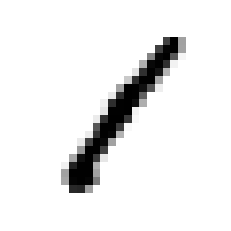

In [44]:
plt.imshow(first_image.to_numpy().reshape(28,28), cmap='binary')
plt.axis("off")
plt.show

Normalization

In [45]:
X = X / 255

Reshape

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [47]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

CNN

Define the model 

Model Definition

In [48]:
model = Sequential()
model.add(Dense(128, activation = "relu", input_shape =(784,)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation ="softmax"))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics = ['accuracy'])

In [51]:
tf.config.run_functions_eagerly(True)
import warnings
warnings.filterwarnings("ignore")

In [52]:
model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
378/378 [==============================] - 8s 22ms/step - loss: 0.3855 - accuracy: 0.8894 - val_loss: 0.2119 - val_accuracy: 0.9400
Epoch 2/10
378/378 [==============================] - 9s 23ms/step - loss: 0.1527 - accuracy: 0.9550 - val_loss: 0.1617 - val_accuracy: 0.9545
Epoch 3/10
378/378 [==============================] - 9s 23ms/step - loss: 0.1035 - accuracy: 0.9694 - val_loss: 0.1311 - val_accuracy: 0.9624
Epoch 4/10
378/378 [==============================] - 9s 24ms/step - loss: 0.0768 - accuracy: 0.9758 - val_loss: 0.1190 - val_accuracy: 0.9667
Epoch 5/10
378/378 [==============================] - 8s 21ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.1110 - val_accuracy: 0.9702
Epoch 6/10
378/378 [==============================] - 9s 23ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.1243 - val_accuracy: 0.9662
Epoch 7/10
378/378 [==============================] - 8s 22ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.1237 - val_accuracy: 0.9679

In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test)

132/132 [==============================] - 1s 8ms/step - loss: 0.1254 - accuracy: 0.9679


In [54]:
print(test_acc)

0.9678571224212646


In [55]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)

132/132 [==============================] - 0s 2ms/step


In [56]:
print(np.round(y_pred[0]))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [57]:
y_true = np.argmax(y_test, axis = 1)

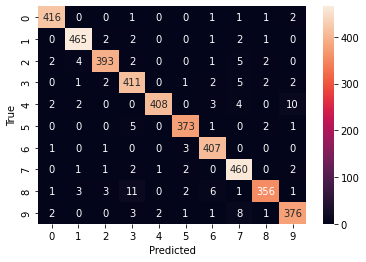

In [60]:
confusion = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [61]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       422
           1       0.98      0.98      0.98       473
           2       0.98      0.96      0.97       409
           3       0.94      0.96      0.95       426
           4       0.99      0.95      0.97       429
           5       0.98      0.98      0.98       382
           6       0.96      0.99      0.97       412
           7       0.95      0.98      0.96       469
           8       0.98      0.93      0.95       384
           9       0.95      0.95      0.95       394

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200

